<center>
<img align ="left" src="hacettepe.png" alt="Hacettepe University Logo" width="200\">
<br><h1>HACETTEPE UNIVERSITY</h1>
<h1>ELE492 : Image Processing | HW-3</h1>
<h2>Ayşe İdman - 21728366</h2>
</center>

___

### Q1)
<br>


<pre>I pledge that I have not received or given any aid in this homework. 
All the work presented below is my own work.
                
                                                             <b>Ayşe İdman 
                                                                21728366</b>
</pre>
<img align ="right" src="signature.png" alt="Hacettepe University Logo" width="250">

___

### Q2)

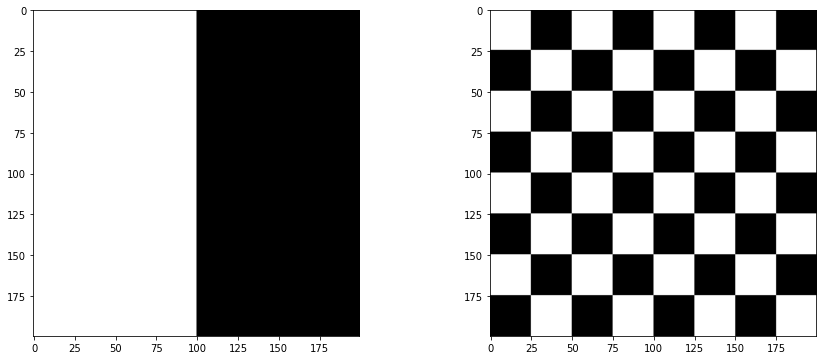

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image1 = np.ones((200,200,3),np.uint8)*255 #because of matplotlib we need to write 3 even though 1 is enough for grayscale
image1[0:200, 100:200] = 0 # making right half black


image2 = np.zeros((50,50,3),np.uint8)
image2[0:25, 0:25] = [255,255,255] # adding white square to top-left
image2[25:50, 25:50] = [255,255,255] # adding white square to bottom-right
image2 = np.tile(image2,(4,4,1)) #repeating pattern to the right and to the below

#printing
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.imshow(image1, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(image2, cmap = 'gray')
plt.show()


As you can see I plotted the both images. I take advantage of tile function (for the second image) which repeats pattern in 2 dimensional.  

___

### Q3)

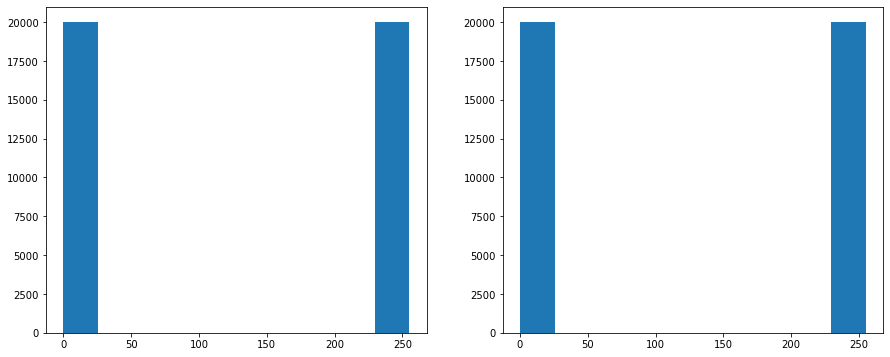

In [2]:
#printing histograms of the images
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.hist(image1[:, :, 0].flatten()) #making image 1D array
plt.subplot(1,2,2)
plt.hist(image2[:, :, 0].flatten()) #making image 1D array
plt.show()

As expected, both of the images have the same histogram. Even though the patterns are different, number of the black pixels and white pixels are the same so as a result the histograms are the same too.

___

### Q4)

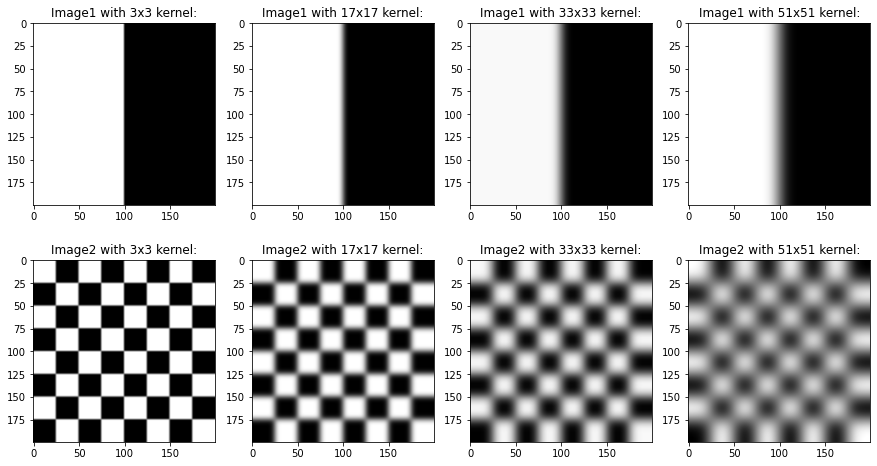

In [3]:
kernel_sizes = [(3,3),(17,17),(33,33),(51,51)] #random kernel sizes
n=1 #counter for subplot
image1_blur = [] #array of blurred images of image1
image2_blur = [] #array of blurred images of image2
plt.figure(figsize = (15,8))
for (k1,k2) in kernel_sizes: 
    image1_blur.append(cv2.GaussianBlur(image1,(k1,k2),0)) #blurring the image then appending to array
    plt.subplot(2,4,n)
    plt.imshow(image1_blur[n-1], cmap = 'gray')
    plt.title("Image1 with "+str(k1)+"x"+str(k2)+" kernel:")

    image2_blur.append(cv2.GaussianBlur(image2,(k1,k2),0)) #blurring the image then appending to array
    plt.subplot(2,4,n+4)
    plt.imshow(image2_blur[n-1], cmap = 'gray')
    plt.title("Image2 with "+str(k1)+"x"+str(k2)+" kernel:")
    n = n+1
plt.show()

One of the crucial parameter of the gaussian filter is the kernel size. By observing from the above results, we can say that the larger the kernel size, the more blurred images become. 

___

### Q5)

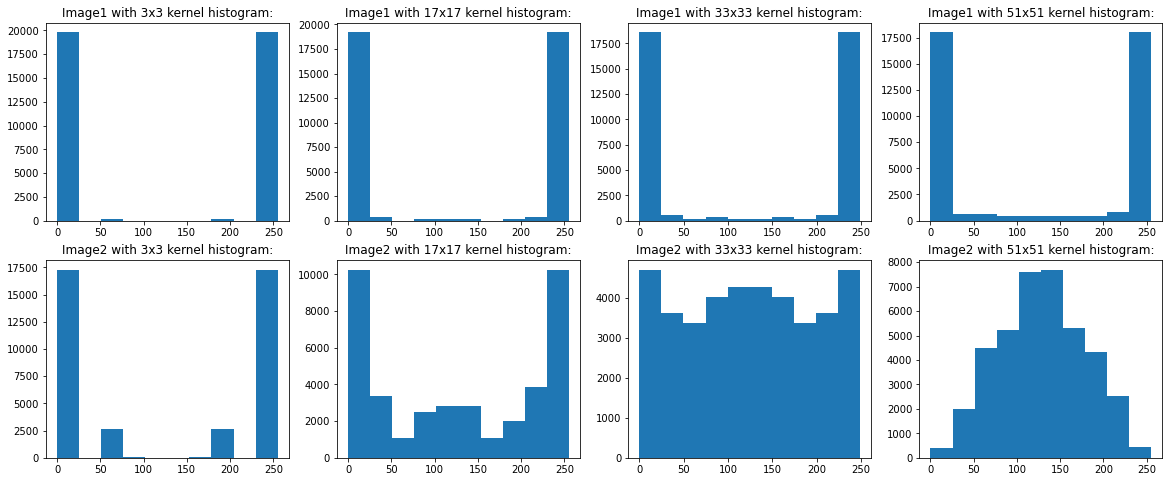

In [4]:
#histograms of the blurred images
n=1
plt.figure(figsize = (20,8))
for (k1,k2),blur1,blur2 in zip(kernel_sizes,image1_blur,image2_blur):
    plt.subplot(2,4,n)
    plt.hist(blur1[:, :, 0].flatten())
    plt.title("Image1 with "+str(k1)+"x"+str(k2)+" kernel histogram:")
    
    plt.subplot(2,4,n+4)
    plt.hist(blur2[:, :, 0].flatten())
    plt.title("Image2 with "+str(k1)+"x"+str(k2)+" kernel histogram:")
    
    n=n+1
plt.show()

___

### Q6)

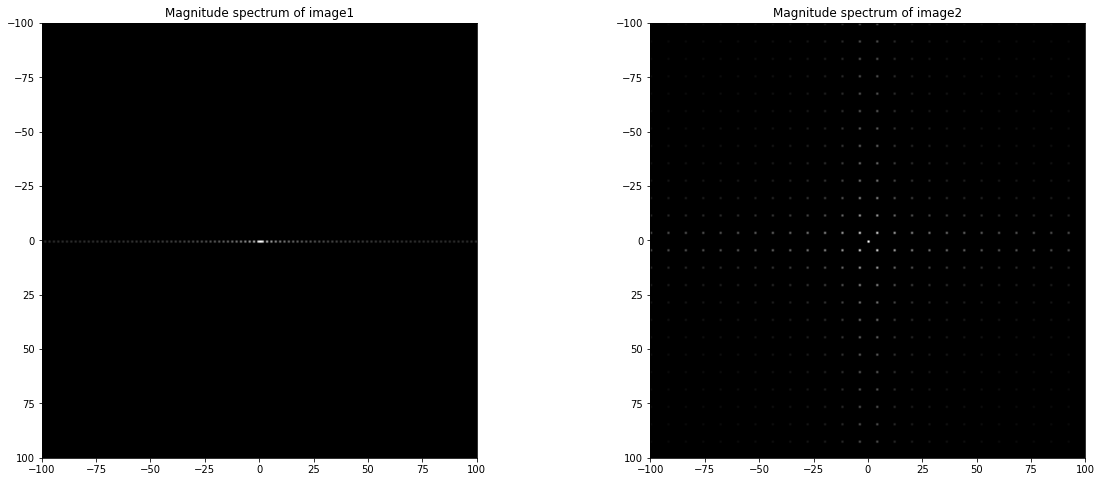

In [5]:
#fft of the images

plt.figure(figsize = (20,8))
fft_image1 = np.fft.fftshift(np.fft.fft2(image1[:,:,0])/(200*200)) #fft of image1
magnitude_spectrum1 = 20*np.log(abs(fft_image1)+1) #magnitude spectrum of image1

plt.subplot(1,2,1)
plt.imshow(magnitude_spectrum1, cmap = 'gray', extent = [-100,100,100,-100])
plt.title("Magnitude spectrum of image1")

fft_image2 = np.fft.fftshift(np.fft.fft2(image2[:,:,0])/(200*200)) #fft of image2
magnitude_spectrum2 = 20*np.log(abs(fft_image2)+1)  #magnitude spectrum of image2
plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum2, cmap = 'gray', extent = [-100,100,100,-100])
plt.title("Magnitude spectrum of image2")

plt.show()

___

### Q7)

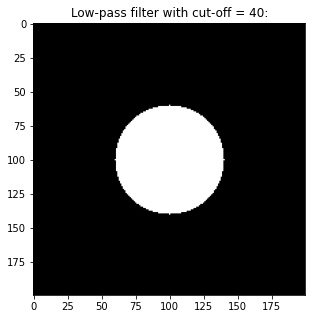

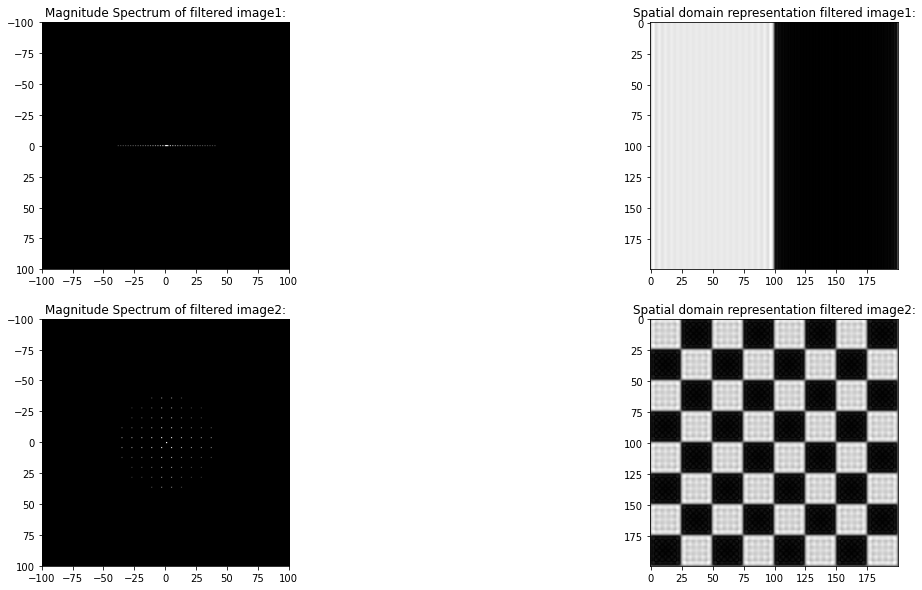

In [6]:
#ideal low-pass filtering
def ideal_LP(cut_off,fft_image): #creates ideal low-pass filter and returns the filter and  filtered image in freq. domain
    h,w = fft_image.shape #taking image height and width so that we can arrange filter height and weight
    LP_filter = np.zeros((h,w),np.uint8) #black image
    #adding a full circle to the black image with parameters: source,coordinates,radius,color,width of circle(-1 = full)
    cv2.circle(LP_filter,(int(h/2),int(w/2)), cut_off, 1, -1) 
    #filtering operation
    filtered_fft_image = LP_filter*fft_image 
    filtered_fft_image_magn = 20*np.log(abs(filtered_fft_image)+1) #magnitude spectrum in dB
    
    return LP_filter,filtered_fft_image,filtered_fft_image_magn

#function call to obtain low-pass filter and filtered images in frequency domain (cut_off = 40)
lowpass,filtered_fft_image1,filtered_fft_image_magn1 = ideal_LP(40,fft_image1)
_,filtered_fft_image2,filtered_fft_image_magn2 = ideal_LP(40,fft_image2)

#spatial domain (taking inverse fft)
filtered_image1 = abs(np.fft.ifft2(np.fft.ifftshift(filtered_fft_image1))*200*200)
filtered_image2 = abs(np.fft.ifft2(np.fft.ifftshift(filtered_fft_image2))*200*200)

#normalizing (mapping the intensities between [0,1])

filtered_image1 = (filtered_image1-np.min(filtered_image1))/(np.max(filtered_image1)-np.min(filtered_image1))
filtered_image2 = (filtered_image2-np.min(filtered_image2))/(np.max(filtered_image2)-np.min(filtered_image2))

#printing
plt.figure(figsize = (9,5))
plt.imshow(lowpass,cmap = 'gray')
plt.title("Low-pass filter with cut-off = 40:")

plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.imshow(filtered_fft_image_magn1,cmap = 'gray',extent = [-100,100,100,-100])
plt.title("Magnitude Spectrum of filtered image1:")
plt.subplot(2,2,2)
plt.imshow(filtered_image1,cmap = 'gray')
plt.title("Spatial domain representation filtered image1:")
plt.subplot(2,2,3)
plt.imshow(filtered_fft_image_magn2,cmap = 'gray',extent = [-100,100,100,-100])
plt.title("Magnitude Spectrum of filtered image2:")
plt.subplot(2,2,4)
plt.imshow(filtered_image2,cmap = 'gray')
plt.title("Spatial domain representation filtered image2:")


plt.show()    

At the beginning, I created an ideal low-pass filter by simply adding a white circle in the center of a black image. Then I took the fft of the images and multiply them with the low-pass filter in the frequency domain. For more clearity, I printed both frequency and spatial domain representation of the images. As expected, in the frequency domain, we can cleary observe that the higher components ara vanished. In the spatial domain, we observe a blurring effect because of the nature of the low-pass filter. In addition, we obtain some unwanted lines in the spatial domain which is called ringing artifact. This is a result of using an ideal low-pass filter. In order to get rid-of ringing, we can use other smoothing filters such as Gaussian or averaging filter. 

Most important parameter while using an ideal low-pass filter is the radius of the circle as known as the cut-off of the filter. The higher the cut-off frequency, the more the side components stay present which causes less blurring effect.

___